<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  An√°lisis de Correspondencias Simples</p>   </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Diplomado Ciencia de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Curso 2025-1</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabi√°n S√°nchez</p></tp>
        </td>
    </tr>
</table>

In [ ]:
%%html
<center><marquee style='width: 60%; color: red'><b>‚úå ¬°Hola a todos y a todas! Un saludo... Bienvenidos a la clase de An√°lisis de Correspondencias (AC)‚úå </b></marquee><center>

# <FONT SIZE=5 COLOR="purple"> 1. Algunos elementos previos </FONT>

El **an√°lisis de correspondencias** es una t√©cnica estad√≠stica multivariada que se utiliza principalmente para analizar *tablas de contingencia* (frecuencias cruzadas) entre dos variables categ√≥ricas. El objetivo es representar gr√°ficamente la asociaci√≥n entre las categor√≠as de ambas variables en un espacio de pocas dimensiones (generalmente 2D).

Observe que en la definici√≥n aparecen algunos elementos conceptuales que es importante precisar. Esto lo haremos a continuaci√≥n e iremos ejemplificando.

Recordemos que:



## <FONT SIZE=5 COLOR="blue"> 1.1 Tabla de Contingencia:</FONT>

***Tabla de Contingencia:*** Una tabla de contingencia (tambi√©n conocida como tabla cruzada o tabla de doble entrada) es una herramienta estad√≠stica que resume la relaci√≥n entre dos variables categ√≥ricas. Muestra c√≥mo se distribuyen las observaciones seg√∫n las combinaciones de categor√≠as de ambas variables.

En ese sentido, podemos tener la tabla ya establecida o la podemos hacer con la instrucci√≥n

$$pd.crosstab(datos[``variable1"], datos[``variable1"])$$

Veamos un ejemplo

In [125]:
# librer√≠as de trabajo con dataframes
import pandas as pd
import numpy as np

# librer√≠as de gr√°ficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [126]:
# 1. cargamos los datos
aptos = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/APARTAMENTOS.csv")
aptos.head()


Unnamed: 0  precio    mt2 ubicacion  estrato  alcobas  banos balcon  \
0           1    79.0  43.16     norte        3        3      1     si   
1           2    93.0  56.92     norte        2        2      1     si   
2           3   100.0  66.40     norte        3        2      2     no   
3           4   123.0  61.85     norte        2        3      2     si   
4           5   135.0  89.80     norte        4        3      2     si   

  parqueadero  administracion     avaluo terminado  
0          si           0.050  14.923002        no  
1          si           0.069  27.000000        si  
2          no           0.000  15.738427        no  
3          si           0.130  27.000000        no  
4          no           0.000  39.567000        si

In [127]:
# 2. tabla de contingencia de la variable ubicaci√≥n y estrato
pd.crosstab(aptos["ubicacion"],aptos["estrato"])

estrato         2   3   4   5    6
ubicacion                         
aburra sur      3  73  57  35    1
belen guayabal  1  30  21  15    0
centro          0  16  21   1    0
laureles        0   0  14  56    3
norte           2   5   3   0    0
occidente       2  37  15  15    0
poblado         0   0   7  23  238

## <FONT SIZE=5 COLOR="blue"> 1.2 Valor esperado bajo la hip√≥tesis de independencia </FONT>

Para entender este concepto lo aplicaremos directamente a una matriz de contingencia que representa el consumo de caf√©, t√© y jugo en tres n√∫cleos poblacionales: j√≥venes, adultos y mayores.

In [128]:
# vamos a construir un conjunto de datos
Caf√© = [20,30,10,60]
T√© = [10,20,30,60]
Jugo = [20,10,10,40]
Total_fila = [50,60,50,160]
Tabla= pd.DataFrame({"Caf√©":Caf√©,"T√©":T√©,"Jugo":Jugo,"Total fila":Total_fila},index=["J√≥venes","Adultos","Mayores","Total columna"])
Tabla

Caf√©  T√©  Jugo  Total fila
J√≥venes          20  10    20          50
Adultos          30  20    10          60
Mayores          10  30    10          50
Total columna    60  60    40         160

In [129]:
50/160*60

18.75

Adem√°s, si no tenemos en cuenta los totales

In [130]:
# eliminar la ultima fila y la ultima columna de la tabla
datos = Tabla.iloc[0:3,0:3]
datos

Caf√©  T√©  Jugo
J√≥venes    20  10    20
Adultos    30  20    10
Mayores    10  30    10

Vamos a llamar

$$E = \text{Valor esperado bajo la hipotesis de independencia}$$

entre dos variables categ√≥ricas. Esto es,

***¬øCu√°ntas observaciones esperar√≠amos en una celda de la tabla de contingencia si no existiera relaci√≥n entre las variables?***

**Importante:** Cuando se hace un an√°lisis de correspondencias o una prueba de chi-cuadrado, siempre se est√° comparando lo que realmente ocurri√≥ (los valores observados) con lo que habr√≠a ocurrido por azar si las dos variables no tuvieran ninguna asociaci√≥n.

**Comparacion**: *Realmente ocurrio* con *Qu√© habr√≠a ocurrido bajo independencia*

Ese "por azar" es justamente lo que se calcula con $E$.

Pero, ¬øqu√© es eso de qu√© habr√≠a ocurrido bajo independencia?

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/5ee222f238d648467c5f760b349cd3c00c37cb1f/AC1.png?raw=true" alt="centered image" width="550" height="350"></center><center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboraci√≥n propia </FONT> <figcaption></center>


Para calcular este valor debemos recurrir al concepto de independencia entre variables.



**Independencia:** Dos variables son independientes si conocer el valor de una no cambia la probabilidad de observar la otra.

Por ejemplo

Variable 1 : grupo de edades (J√≥venes, Adultos, Mayores)

Variable 2 : bebida preferida (Caf√©, T√©, Jugo)

Si tomamos dos categor√≠as y son independientes, por ejemplo

$$P(Te \mid Mayores) = P(Te)$$

La probabilidad de que tomen $Te$ no depende del grupo $Mayores$.

**¬øC√≥mo calculamos ese valor esperado $E$?**

Recordemos que tenemos una tabla de contingencias, luego

- Filas: categor√≠as de una variable

- Columnas: categor√≠as de otra variable

- Celdas: conteos de combinaciones

Entonces, la probabilidad conjunto de dos eventos independientes es

$$P(A \cap B) = P(A) . P(B) = \dfrac{\text{casos favorables A}}{Total}.\dfrac{\text{casos favorables B}}{Total}$$

$$P(A\cap B) = \dfrac{(\text{Total fila categoria A}).(\text{Total fila categoria B})}{Total^2}$$

Este valor da una porcentaje que representa la probabilidad, entonces lo multiplicamos por el total y obtenemos

$$E_{ij} = \dfrac{(\text{Total fila i}).(\text{Total fila j})}{\text{Total General}}$$

Particularmente, en el ejemplo

- $P(Mayores) = \dfrac{50}{160}$

- $P(Te) = \dfrac{60}{160}$

Si suponemos que son independientes, la probabilidad conjunta deber√≠a ser:

$$P(Mayores \cap Te) = P(Mayores). P(Te) = \dfrac{50}{160}.\dfrac{60}{160} = 0.1171 $$

Esto me da la probabilidad, pero como queremos saber "cu√°ntos"? es decir, la frecuencia esperada

$$E_{ij} = 0.1171*160 = 18.75$$

Es el n√∫mero de personas mayores que esperar√≠amos que elijan t√©, si no hubiera ninguna relaci√≥n entre edad y bebida preferida

En otras palabras:

  - Si el grupo de edad no tuviera nada que ver con la elecci√≥n de bebida (es decir, si fueran independientes),

  - Entonces, por pura proporci√≥n matem√°tica, esperar√≠amos que 18.75 personas mayores eligieran t√©.

Entonces, observe que lo que ocurre realmente es mayor de lo que que esperabamos

$$30 > 18.75$$

En este caso decimos que hay una asociaci√≥n positiva: los mayores eligen t√© m√°s de lo esperado por azar
  

## <FONT SIZE=5 COLOR="blue"> 1.3 Asociaci√≥n y Mapa de Correspondencias </FONT>

La **asociaci√≥n** en el an√°lisis de correspondencias se refiere a qu√© tan relacionadas est√°n las categor√≠as de dos variables categ√≥ricas. Es decir, si la ocurrencia de cierta categor√≠a de una variable est√° m√°s (o menos) relacionada con ciertas categor√≠as de la otra variable, se dice que existe una asociaci√≥n entre ellas.

**¬øQu√© significa asociaci√≥n positiva o negativa?**

Esto se refiere a si una combinaci√≥n de categor√≠as ocurre m√°s o menos frecuentemente de lo esperado bajo independencia:

 - **Asociaci√≥n positiva:**

   - La combinaci√≥n ocurre m√°s de lo esperado.

   - Ejemplo: si esper√°bamos que 15 j√≥venes eligieran jugo pero en realidad 25 lo hicieron ‚Üí hay asociaci√≥n positiva entre "J√≥venes" y "Jugo".

   - En el mapa de correspondencias, los puntos est√°n cerca entre s√≠.

 - **Asociaci√≥n negativa:**

   - La combinaci√≥n ocurre menos de lo esperado.

   - Ejemplo: si esper√°bamos que 15 mayores eligieran caf√© pero solo 5 lo hicieron ‚Üí hay asociaci√≥n negativa entre "Mayores" y "Caf√©".

   - En el mapa de correspondencias, los puntos est√°n lejos o en direcci√≥n opuesta.

En el mapa de correspondencias (gr√°fico que genera el AC y que veremos m√°s adelante), se representan las categor√≠as como puntos. La distancia entre puntos refleja el grado de asociaci√≥n.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/8bbdc881d80b5b106239617592338c475b072d93/AC2.png?raw=true" alt="centered image" width="550" height="350"></center><center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboraci√≥n propia </FONT> <figcaption></center>



## <FONT SIZE=5 COLOR="blue"> 1.4 Prueba de Chi-Cuadrado para AC </FONT>

La prueba de chi-cuadrado sirve para verificar si existe asociaci√≥n significativa entre las dos variables categ√≥ricas en la tabla de contingencia. En el contexto del An√°lisis de Correspondencias, es el punto de partida te√≥rico:

El valor total de chi-cuadrado se calcula como:

$$\chi^2 = \sum \limits_{i,j} \dfrac{(O_{ij}-E_{i,j})^2}{E_{ij}}$$

donde,

  - $O_{ij}:$ valor observado (frecuencia real)

  - $E_{ij}:$ valor esperado bajo independencia

  - Los grados de libertad de la chi-cuadrado son

  $$(\text{numero de filas}-1).(\text{numero de columnas}-1)$$

Este valor es proporcional a la inercia total en el an√°lisis de correspondencias, que representa la cantidad de variaci√≥n (o informaci√≥n) que el modelo est√° capturando. En variables categ√≥ricas no se habla de varianza, sino de inercia.

**Inercia y chi-cuadrado**

En el AC, la inercia total (parecida a la varianza total en PCA) se define como:

$$Inercia\_Total = \dfrac{\chi^2}{n}$$

donde,

 - $\chi^2$, valor de la estad√≠stica chi-cuadrado

 - $n$ es el n√∫mero total de observaciones

**La inercia total es lo que el AC descompone en dimensiones: cada eje (componente) explica parte de esta inercia**

La prueba de chi-cuadrado se aplica antes del an√°lisis si queremos confirmar que existe asociaci√≥n significativa entre las dos variables. Es una prueba de hip√≥tesis

$$\begin{cases} H_0: \text{las variables son independientes (no hay asociacion)} \\
H_1:  \text{las variables son dependientes ( s√≠ hay asociacion)}    \end{cases}$$

Recordemos, que esto se determina con el $p-valor$.

Si $p-valor < 0.05$ se rechaza la hip√≥tesis nula por que hay evidencia de asociaci√≥n significativa. Vale la pena aplicar AC.

Si $p-valor ‚â• 0.05 $ entonces los datos est√°n cerca de la independencia, luego el AC no revelar√° patrones fuertes.


Veamos c√≥mo se hace esto usando herramientas de python

In [131]:
# cargamos la librer√≠a que me permite hacer la prueba chi-cuadrado
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(datos)

print(f"\nEstad√≠stica chi-cuadrado: {chi2:.4f}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p:.4f}")
print("\nTabla de frecuencias esperadas bajo independencia:")
print(pd.DataFrame(expected, index=datos.index, columns=datos.columns))


Estad√≠stica chi-cuadrado: 24.4444
Grados de libertad: 4
Valor p: 0.0001

Tabla de frecuencias esperadas bajo independencia:
          Caf√©     T√©  Jugo
J√≥venes  18.75  18.75  12.5
Adultos  22.50  22.50  15.0
Mayores  18.75  18.75  12.5


Como el valor $p = 0.001 < 0.05$, entonces hay evidencia suficiente para rechazar la hip√≥tesis de independencia, luego hay asociaci√≥n significativa entre grupo de edad y preferencia de bebida.

# <FONT SIZE=5 COLOR="purple"> 2. Pasos del An√°lisis de Correspondencias </FONT>

Para hacer el an√°lisis de correspondencias seguiremos los siguientes pasos.

1. Calcular la matriz de frecuencias relativas

2. Calcular los perfiles y marginales (Valor Esperado)

3. Calcular la matriz de desviaciones

4. Descomponer en valores singulares (valores y vectores propios)

5. Calcular las coordenadas factoriales de filas y columnas

## <FONT SIZE=4 COLOR="purple"> 2.1 Calcular la matriz de frecuencias relativas </FONT>

Dividimos cada celda por el total general (160) para convertir los conteos en proporciones:

$$P = \dfrac{n_{ij}}{N}$$

Por ejemplo:

$$jovenes/cafe =  \dfrac{20}{160} = 0.125$$

In [132]:
# hacemos la matriz de proporciones
datos_prop = datos/160
datos_prop

Caf√©      T√©    Jugo
J√≥venes  0.1250  0.0625  0.1250
Adultos  0.1875  0.1250  0.0625
Mayores  0.0625  0.1875  0.0625

## <FONT SIZE=4 COLOR="purple"> 2.2  Perfiles y marginales </FONT>

Tenemos dos perfiles:

 - **Perfiles fila**:  es la suma de cada fila (proporci√≥n de la muestra en ese grupo).

 - **Perfiles columna**: es la suma de cada columna (proporci√≥n de cada bebida en el total).

 Por ejemplo,

 - $\text{Perfil fila de Jovenes} = 0.1250+0.0625+0.1250 = 0.3125$
 - $\text{Perfil fila de Adultos} = 0.1875+0.1250+0.0625 = 0.375$
 - $\text{Perfil fila de Mayores} = 0.0625+0.1875+0.0625 = 0.3125$

De estos valores sale el marginal en fila

$$\mathbf{r} = [0.3125 \quad  0.375 \quad 0.3125] $$

 - $\text{Perfil fila de Cafe} = 0.1250+0.1875+0.0625 = 0.375$
 - $\text{Perfil fila de Te}   = 0.0625+0.1250+0.0625 = 0.375$
 - $\text{Perfil fila de Jugo} = 0.1250+0.0625+0.0625 = 0.250$

De estos valores sale el marginal en columna

$$\mathbf{c} = [0.375 \quad 0.375 \quad 0.250] $$


In [133]:
r = datos.sum(axis=1) / 160  ; print( r )
c = datos.sum(axis=0) / 160  ; print( c )

J√≥venes    0.3125
Adultos    0.3750
Mayores    0.3125
dtype: float64
Caf√©    0.375
T√©      0.375
Jugo    0.250
dtype: float64


## <FONT SIZE=4 COLOR="purple"> 2.3 Matriz de Desviaciones </FONT>

Calculamos la diferencia entre las frecuencias observadas y las esperadas bajo independencia (producto de los marginales):

$$E_{ij} = r_i.c_j$$

$$S_{ij} = \dfrac{P_{ij}-E_{ij}}{\sqrt{(r_i.c_j)}}$$

Esto nos da una matriz de desviaciones estandarizadas, que mide cu√°n diferente es la proporci√≥n observada respecto a lo esperado por azar.

In [134]:
# Paso 1: Tabla de contingencia
datos = pd.DataFrame({
    'Caf√©': [20, 30, 10],
    'T√©': [10, 20, 30],
    'Jugo': [20, 10, 10]
}, index=['J√≥venes', 'Adultos', 'Mayores'])

# Total general
N = datos.to_numpy().sum()

# Paso 2: Proporciones observadas (P)
P = datos / N

# Paso 3: Perfiles fila (r) y columna (c)
r = datos.sum(axis=1) / N   # perfil fila
c = datos.sum(axis=0) / N   # perfil columna

# Paso 4: Matriz de frecuencias esperadas bajo independencia
E = pd.DataFrame(np.outer(r, c), index=datos.index, columns=datos.columns)

# Paso 5: Matriz de desviaciones estandarizadas
S = (P - E) / np.sqrt(E)

# Mostrar resultados
print("Proporciones observadas (P):")
print(P.round(4))
print("\nProporciones esperadas (E):")
print(E.round(4))
print("\nMatriz de desviaciones estandarizadas (S):")
print(S.round(4))

Proporciones observadas (P):
           Caf√©      T√©    Jugo
J√≥venes  0.1250  0.0625  0.1250
Adultos  0.1875  0.1250  0.0625
Mayores  0.0625  0.1875  0.0625

Proporciones esperadas (E):
           Caf√©      T√©    Jugo
J√≥venes  0.1172  0.1172  0.0781
Adultos  0.1406  0.1406  0.0938
Mayores  0.1172  0.1172  0.0781

Matriz de desviaciones estandarizadas (S):
           Caf√©      T√©    Jugo
J√≥venes  0.0228 -0.1598  0.1677
Adultos  0.1250 -0.0417 -0.1021
Mayores -0.1598  0.2054 -0.0559


## <FONT SIZE=4 COLOR="purple"> 2.4 Descomposici√≥n en valores singulares (SVD) </FONT>

Aplicamos una descomposici√≥n en valores singulares (SVD) a la matriz de **desviaciones estandarizadas** para reducir la dimensi√≥n del problema.

**Importante:** Esto permite representar las filas y columnas en un espacio de baja dimensi√≥n (2D o 3D) donde:

  - Las filas cercanas entre s√≠ tienen perfiles similares.

  - Las columnas cercanas a una fila est√°n asociadas a esa categor√≠a.

  - Esto es lo que permite graficar el mapa de correspondencias.

In [135]:
# Convertir a matriz NumPy
S_matrix = S.to_numpy()

# SVD: S = U * Œ£ * V^T
U, singular_values, VT = np.linalg.svd(S_matrix, full_matrices=False)

# Mostrar valores singulares
print("Valores singulares (Œ£):")
print(singular_values)

# Mostrar valores propios
print("Valores propios:")
print(singular_values**2)

# Coordenadas de las filas (U * Œ£)
row_coords = U * singular_values

# Coordenadas de las columnas (V^T * Œ£)
col_coords = (VT.T) * singular_values

# Convertir a DataFrame para visualizaci√≥n clara
row_coords_df = pd.DataFrame(row_coords, index=S.index, columns=["Dim 1", "Dim 2", "Dim 3"])
col_coords_df = pd.DataFrame(col_coords, index=S.columns, columns=["Dim 1", "Dim 2", "Dim 3"])

print("\nCoordenadas de filas (U * Œ£):")
print(row_coords_df.round(4))

print("\nCoordenadas de columnas (V * Œ£):")
print(col_coords_df.round(4))

Valores singulares (Œ£):
[0.33 0.2  0.  ]
Valores propios:
[0.11 0.04 0.  ]

Coordenadas de filas (U * Œ£):
          Dim 1   Dim 2  Dim 3
J√≥venes -0.2021  0.1155    0.0
Adultos -0.0527 -0.1581    0.0
Mayores  0.2598  0.0577    0.0

Coordenadas de columnas (V * Œ£):
       Dim 1   Dim 2  Dim 3
Caf√© -0.1581 -0.1291   -0.0
T√©    0.2635  0.0000   -0.0
Jugo -0.1291  0.1581   -0.0


- Los valores singulares (valores propios) Œ£: indican cu√°nta varianza (inercia) explica cada dimensi√≥n.

- Las coordenadas de las filas y columnas en el espacio reducido: eso es lo que se grafica en un biplot de correspondencias.

## <FONT SIZE=4 COLOR="purple"> 2.5 Coordenadas de filas y columnas </FONT>

Se calculan las coordenadas factoriales (x, y) de cada fila y columna a partir de los valores singulares y vectores propios obtenidos.

Estos puntos son los que se visualizan en el biplot. La interpretaci√≥n geom√©trica es:

  - Cuanto m√°s cerca est√©n fila y columna, m√°s fuerte es su asociaci√≥n.

  - Si fila y columna est√°n en direcciones opuestas respecto al centro, tienen relaci√≥n negativa.

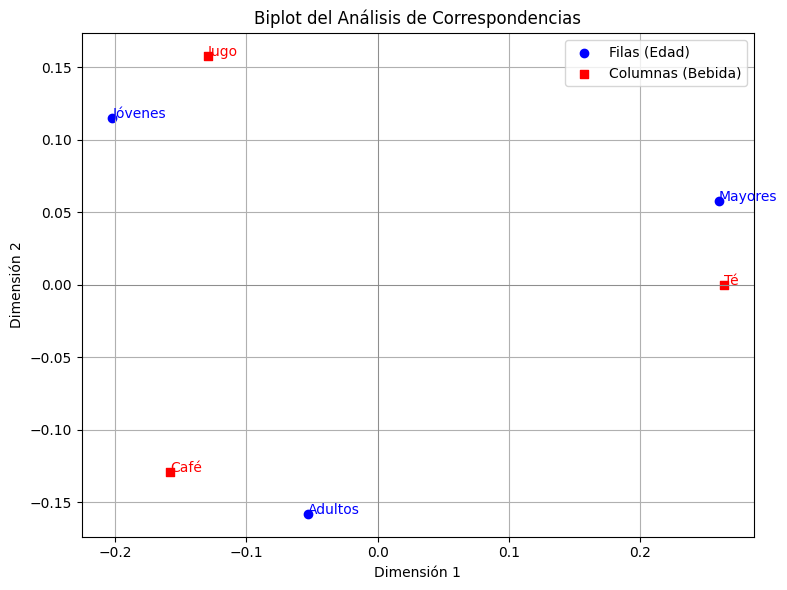

In [136]:
# Crear DataFrames con coordenadas para facilitar etiquetas
row_coords_df = pd.DataFrame(row_coords[:, :2], index=datos.index, columns=["Dim 1", "Dim 2"])
col_coords_df = pd.DataFrame(col_coords[:, :2], index=datos.columns, columns=["Dim 1", "Dim 2"])

# Graficar
fig, ax = plt.subplots(figsize=(8, 6))

# Filas (categor√≠as de edad)
ax.scatter(row_coords_df["Dim 1"], row_coords_df["Dim 2"], color='blue', label='Filas (Edad)')
for i, label in enumerate(row_coords_df.index):
    ax.annotate(label, (row_coords_df.iloc[i, 0], row_coords_df.iloc[i, 1]), color='blue')

# Columnas (categor√≠as de bebida)
ax.scatter(col_coords_df["Dim 1"], col_coords_df["Dim 2"], color='red', marker='s', label='Columnas (Bebida)')
for i, label in enumerate(col_coords_df.index):
    ax.annotate(label, (col_coords_df.iloc[i, 0], col_coords_df.iloc[i, 1]), color='red')

# Ejes
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_title("Biplot del An√°lisis de Correspondencias")
ax.set_xlabel("Dimensi√≥n 1")
ax.set_ylabel("Dimensi√≥n 2")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

**Interpretaci√≥n**

 - Puntos azules: categor√≠as de la variable de filas (grupos de edad).

 - Puntos rojos: categor√≠as de la variable de columnas (bebidas).

La distancia entre puntos refleja similitud o asociaci√≥n.

  - "Mayores" est√° cerca de "T√©", entonces hay asociaci√≥n positiva.

  - "J√≥venes" est√° lejos de "T√©", entonces asociaci√≥n negativa

Finalmente, podemos integrar todo en un solo c√≥digo

Proporciones observadas (P):
           Caf√©      T√©    Jugo
J√≥venes  0.1250  0.0625  0.1250
Adultos  0.1875  0.1250  0.0625
Mayores  0.0625  0.1875  0.0625

Proporciones esperadas (E):
           Caf√©      T√©    Jugo
J√≥venes  0.1172  0.1172  0.0781
Adultos  0.1406  0.1406  0.0938
Mayores  0.1172  0.1172  0.0781

Matriz de desviaciones estandarizadas (S):
           Caf√©      T√©    Jugo
J√≥venes  0.0228 -0.1598  0.1677
Adultos  0.1250 -0.0417 -0.1021
Mayores -0.1598  0.2054 -0.0559
 
 Valores propios(Œ£): [0.11 0.04 0.  ]
Inercia total: 0.153
Aporte de cada valor propio: [0.73 0.27 0.  ]
Aporte acumulado: [0.73 1.   1.  ]

Coordenadas de filas (U * Œ£):
          Dim 1   Dim 2  Dim 3
J√≥venes -0.0674  0.0236    0.0
Adultos -0.0176 -0.0323    0.0
Mayores  0.0866  0.0118    0.0

Coordenadas de columnas (V * Œ£):
       Dim 1   Dim 2  Dim 3
Caf√© -0.0527 -0.0264   -0.0
T√©    0.0878  0.0000   -0.0
Jugo -0.0430  0.0323   -0.0


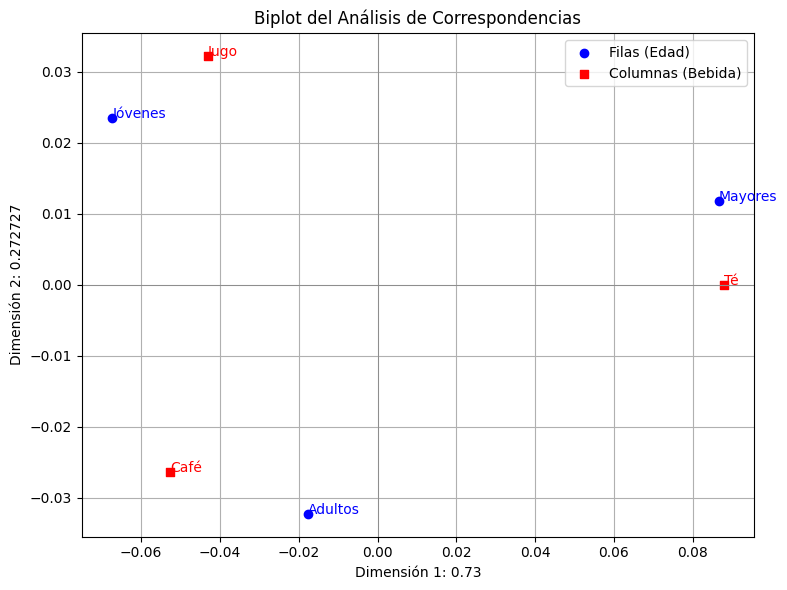

In [137]:
# Paso 1: Tabla de contingencia
datos = pd.DataFrame({
    'Caf√©': [20, 30, 10],
    'T√©': [10, 20, 30],
    'Jugo': [20, 10, 10]
}, index=['J√≥venes', 'Adultos', 'Mayores'])

# Total general
N = datos.to_numpy().sum()

# Paso 2: Proporciones observadas (P)
P = datos / N

# Paso 3: Perfiles fila (r) y columna (c)
r = datos.sum(axis=1) / N   # perfil fila
c = datos.sum(axis=0) / N   # perfil columna

# Paso 4: Matriz de frecuencias esperadas bajo independencia
E = pd.DataFrame(np.outer(r, c), index=datos.index, columns=datos.columns)

# Paso 5: Matriz de desviaciones estandarizadas
S = (P - E) / np.sqrt(E)

# Mostrar resultados
print("Proporciones observadas (P):")
print(P.round(4))
print("\nProporciones esperadas (E):")
print(E.round(4))
print("\nMatriz de desviaciones estandarizadas (S):")
print(S.round(4))

# Convertir a matriz NumPy
S_matrix = S.to_numpy()

# SVD: S = U * Œ£ * V^T
U, singular_values, VT = np.linalg.svd(S_matrix, full_matrices=False)

singular_values =singular_values**2

# Mostrar valores singulares
print(f" \n Valores propios(Œ£): {singular_values}")

inercia = singular_values.sum()
print(f"Inercia total: {inercia:.3f}")

aporte = singular_values/inercia
print(f"Aporte de cada valor propio: {aporte}")

aporte_acumulado = np.cumsum(aporte)
print(f"Aporte acumulado: {aporte_acumulado}")

# Coordenadas de las filas (U * Œ£)
row_coords = U * singular_values

# Coordenadas de las columnas (V^T * Œ£)
col_coords = (VT.T) * singular_values

# Convertir a DataFrame para visualizaci√≥n clara
row_coords_df = pd.DataFrame(row_coords, index=S.index, columns=["Dim 1", "Dim 2", "Dim 3"])
col_coords_df = pd.DataFrame(col_coords, index=S.columns, columns=["Dim 1", "Dim 2", "Dim 3"])

print("\nCoordenadas de filas (U * Œ£):")
print(row_coords_df.round(4))

print("\nCoordenadas de columnas (V * Œ£):")
print(col_coords_df.round(4))

# Crear DataFrames con coordenadas para facilitar etiquetas
row_coords_df = pd.DataFrame(row_coords[:, :2], index=datos.index, columns=["Dim 1", "Dim 2"])
col_coords_df = pd.DataFrame(col_coords[:, :2], index=datos.columns, columns=["Dim 1", "Dim 2"])

# Graficar
fig, ax = plt.subplots(figsize=(8, 6))

# Filas (categor√≠as de edad)
ax.scatter(row_coords_df["Dim 1"], row_coords_df["Dim 2"], color='blue', label='Filas (Edad)')
for i, label in enumerate(row_coords_df.index):
    ax.annotate(label, (row_coords_df.iloc[i, 0], row_coords_df.iloc[i, 1]), color='blue')

# Columnas (categor√≠as de bebida)
ax.scatter(col_coords_df["Dim 1"], col_coords_df["Dim 2"], color='red', marker='s', label='Columnas (Bebida)')
for i, label in enumerate(col_coords_df.index):
    ax.annotate(label, (col_coords_df.iloc[i, 0], col_coords_df.iloc[i, 1]), color='red')

# Ejes
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_title("Biplot del An√°lisis de Correspondencias")
ax.set_xlabel(f"Dimensi√≥n 1: {aporte[0]:.2f}")
ax.set_ylabel(f"Dimensi√≥n 2: {aporte[1]:2f}")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Ahora, usaremos una librer√≠a denominada **prince**

In [139]:
%%capture
!pip install git+https://github.com/MaxHalford/Prince

üìà Valores propios:
Dim 1: 0.1111
Dim 2: 0.0417

‚öôÔ∏è Inercia total: 0.1528

üìä Proporci√≥n de la inercia explicada:
Dim 1: 72.73%
Dim 2: 27.27%


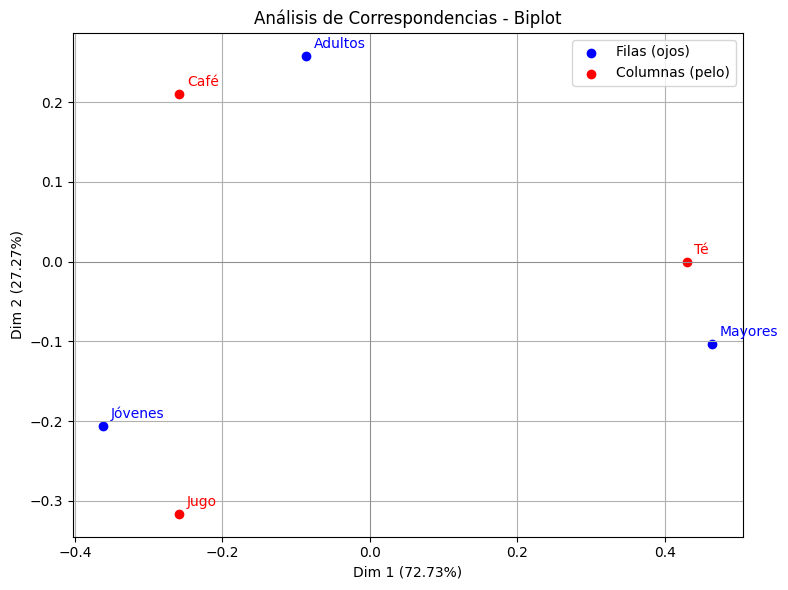

In [140]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Crear el DataFrame
df = datos

# 2. An√°lisis de correspondencias
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
ca = ca.fit(df)

# 3. Obtener valores propios (eigenvalues)
eigenvalues = ca.eigenvalues_
total_inertia = sum(eigenvalues)

# 4. Calcular proporci√≥n de inercia explicada manualmente
explained_inertia = [eig / total_inertia for eig in eigenvalues]

# 5. Imprimir an√°lisis
print("üìà Valores propios:")
for i, val in enumerate(eigenvalues):
    print(f"Dim {i+1}: {val:.4f}")

print("\n‚öôÔ∏è Inercia total:", round(total_inertia, 4))

print("\nüìä Proporci√≥n de la inercia explicada:")
for i, val in enumerate(explained_inertia):
    print(f"Dim {i+1}: {val * 100:.2f}%")

# 6. Coordenadas
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

# 7. Biplot con etiquetas mejoradas
fig, ax = plt.subplots(figsize=(8, 6))

# Filas
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Filas (ojos)')
for i, txt in enumerate(df.index):
    ax.annotate(txt, (row_coords.iloc[i, 0]+0.01, row_coords.iloc[i, 1]+0.01), color='blue')

# Columnas
ax.scatter(col_coords[0], col_coords[1], color='red', label='Columnas (pelo)')
for i, txt in enumerate(df.columns):
    ax.annotate(txt, (col_coords.iloc[i, 0]+0.01, col_coords.iloc[i, 1]+0.01), color='red')

# Ejes con % de inercia explicada
dim1 = explained_inertia[0] * 100
dim2 = explained_inertia[1] * 100
ax.set_xlabel(f'Dim 1 ({dim1:.2f}%)')
ax.set_ylabel(f'Dim 2 ({dim2:.2f}%)')

# Est√©tica
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_title('An√°lisis de Correspondencias - Biplot')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# <FONT SIZE=5 COLOR="purple"> 3. Ejemplo 2 </FONT>

Consideremos la siguiente tabla de contingencias:

In [142]:
## C√≥digo para el ejemplo 1.
arreglo = np.array([688,116,584,188,4,326,38,241,110,3, 343,84,909,412,26,98,48,403,681,85,]).reshape(4,5)
columns = ["Rubio(ru)", "Rojo(r)", "Medio(m)","Oscuro(o)", "Negro(n)"]
index = ["Claros(C)","Azules(A)", "Medio(M)","Oscuros(O)"]
example_df = pd.DataFrame(arreglo, columns = columns, index = index)
example_df

Rubio(ru)  Rojo(r)  Medio(m)  Oscuro(o)  Negro(n)
Claros(C)         688      116       584        188         4
Azules(A)         326       38       241        110         3
Medio(M)          343       84       909        412        26
Oscuros(O)         98       48       403        681        85

üìà Valores propios:
Dim 1: 0.1992
Dim 2: 0.0301

‚öôÔ∏è Inercia total: 0.2293

üìä Proporci√≥n de la inercia explicada:
Dim 1: 86.88%
Dim 2: 13.12%


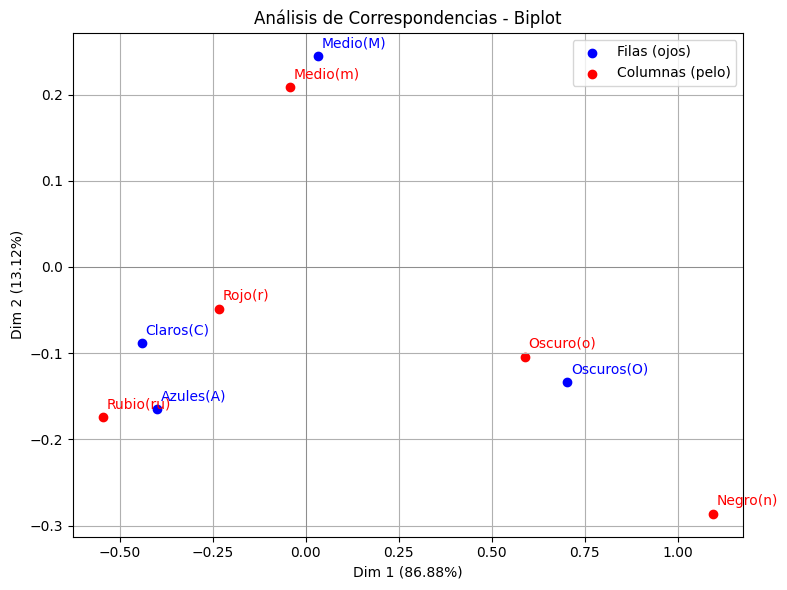

In [143]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Crear el DataFrame
df = example_df

# 2. An√°lisis de correspondencias
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
ca = ca.fit(df)

# 3. Obtener valores propios (eigenvalues)
eigenvalues = ca.eigenvalues_
total_inertia = sum(eigenvalues)

# 4. Calcular proporci√≥n de inercia explicada manualmente
explained_inertia = [eig / total_inertia for eig in eigenvalues]

# 5. Imprimir an√°lisis
print("üìà Valores propios:")
for i, val in enumerate(eigenvalues):
    print(f"Dim {i+1}: {val:.4f}")

print("\n‚öôÔ∏è Inercia total:", round(total_inertia, 4))

print("\nüìä Proporci√≥n de la inercia explicada:")
for i, val in enumerate(explained_inertia):
    print(f"Dim {i+1}: {val * 100:.2f}%")

# 6. Coordenadas
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

# 7. Biplot con etiquetas mejoradas
fig, ax = plt.subplots(figsize=(8, 6))

# Filas
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Filas (ojos)')
for i, txt in enumerate(df.index):
    ax.annotate(txt, (row_coords.iloc[i, 0]+0.01, row_coords.iloc[i, 1]+0.01), color='blue')

# Columnas
ax.scatter(col_coords[0], col_coords[1], color='red', label='Columnas (pelo)')
for i, txt in enumerate(df.columns):
    ax.annotate(txt, (col_coords.iloc[i, 0]+0.01, col_coords.iloc[i, 1]+0.01), color='red')

# Ejes con % de inercia explicada
dim1 = explained_inertia[0] * 100
dim2 = explained_inertia[1] * 100
ax.set_xlabel(f'Dim 1 ({dim1:.2f}%)')
ax.set_ylabel(f'Dim 2 ({dim2:.2f}%)')

# Est√©tica
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_title('An√°lisis de Correspondencias - Biplot')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# <FONT SIZE=5 COLOR="purple"> 4. Ejemplo 3 : Apartamentos </FONT>

Consideremos el conjunto de datos apartamentos

üìà Valores propios:
Dim 1: 0.8278
Dim 2: 0.2340

‚öôÔ∏è Inercia total: 1.0618

üìä Proporci√≥n de la inercia explicada:
Dim 1: 77.97%
Dim 2: 22.03%


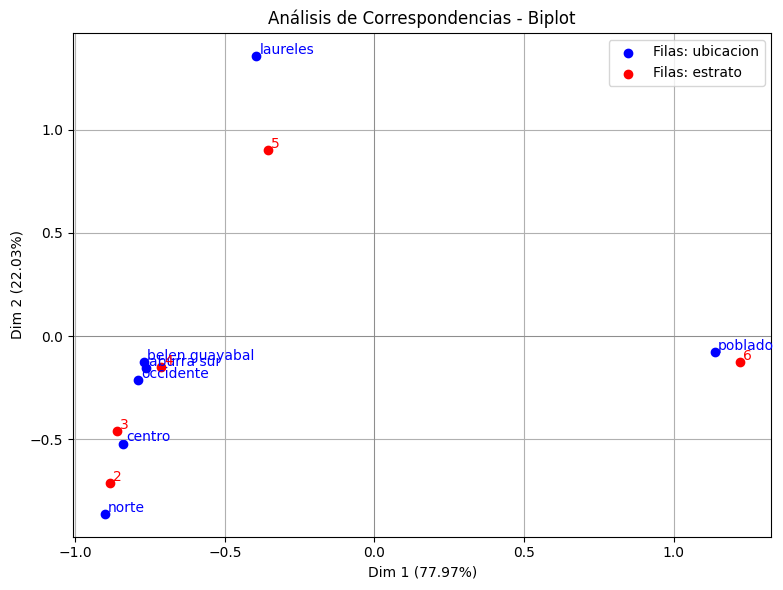

In [145]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Crear el DataFrame
dataframe = aptos
variable1 = "ubicacion"
variable2 = "estrato"

df = pd.crosstab(dataframe[variable1], dataframe[variable2])

# 2. An√°lisis de correspondencias
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
ca = ca.fit(df)

# 3. Obtener valores propios (eigenvalues)
eigenvalues = ca.eigenvalues_
total_inertia = sum(eigenvalues)

# 4. Calcular proporci√≥n de inercia explicada manualmente
explained_inertia = [eig / total_inertia for eig in eigenvalues]

# 5. Imprimir an√°lisis
print("üìà Valores propios:")
for i, val in enumerate(eigenvalues):
    print(f"Dim {i+1}: {val:.4f}")

print("\n‚öôÔ∏è Inercia total:", round(total_inertia, 4))

print("\nüìä Proporci√≥n de la inercia explicada:")
for i, val in enumerate(explained_inertia):
    print(f"Dim {i+1}: {val * 100:.2f}%")

# 6. Coordenadas
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

# 7. Biplot con etiquetas mejoradas
fig, ax = plt.subplots(figsize=(8, 6))

# Filas
ax.scatter(row_coords[0], row_coords[1], color='blue', label=f'Filas: {variable1}')
for i, txt in enumerate(df.index):
    ax.annotate(txt, (row_coords.iloc[i, 0]+0.01, row_coords.iloc[i, 1]+0.01), color='blue')

# Columnas
ax.scatter(col_coords[0], col_coords[1], color='red', label=f'Filas: {variable2}')
for i, txt in enumerate(df.columns):
    ax.annotate(txt, (col_coords.iloc[i, 0]+0.01, col_coords.iloc[i, 1]+0.01), color='red')

# Ejes con % de inercia explicada
dim1 = explained_inertia[0] * 100
dim2 = explained_inertia[1] * 100
ax.set_xlabel(f'Dim 1 ({dim1:.2f}%)')
ax.set_ylabel(f'Dim 2 ({dim2:.2f}%)')

# Est√©tica
ax.axhline(0, color='grey', lw=0.5)
ax.axvline(0, color='grey', lw=0.5)
ax.set_title('An√°lisis de Correspondencias - Biplot')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Un adicional ACM

 - ACM se usa para encuestas de opini√≥n, estudios de mercado, y cualquier an√°lisis con m√∫ltiples preguntas categ√≥ricas.

 - Se puede hacer an√°lisis de segmentos, cl√∫steres de respuestas, y m√°s.

 - NO relaciona categor√≠a por categor√≠a, sino la relaci√≥n global de individuos y modalidades

Supongamos una peque√±a encuesta con 6 personas sobre:

üçΩÔ∏è Comida favorita: Pizza, Sushi, Ensalada

üé® Color favorito: Rojo, Azul, Verde

üéÆ Actividad favorita: Leer, Jugar videojuegos, Deportes


üìà Valores propios (eigenvalues): [0.76 0.61]

% de inercia explicada por dimensi√≥n:
Dim 1: 55.41%
Dim 2: 44.59%


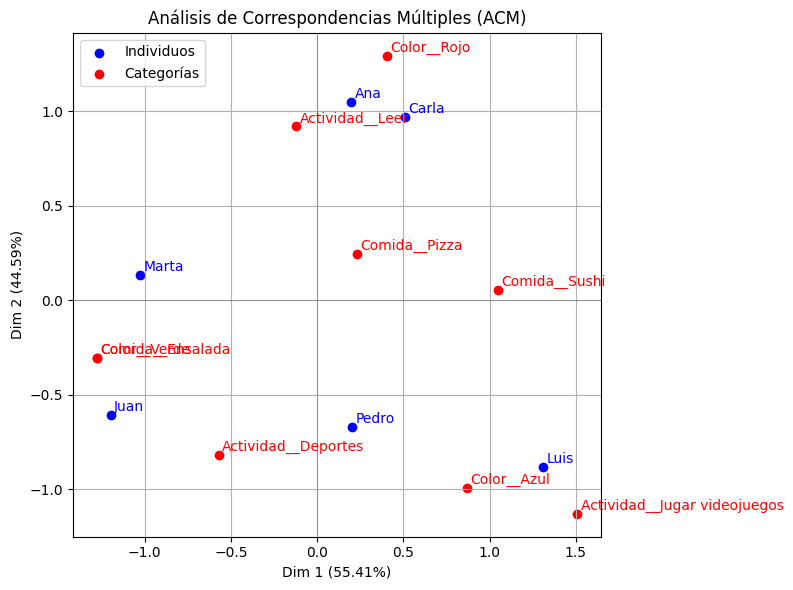

In [146]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# 1. Crear el DataFrame de ejemplo
df = pd.DataFrame({
    'Persona': ['Ana', 'Luis', 'Marta', 'Pedro', 'Carla', 'Juan'],
    'Comida': ['Pizza', 'Sushi', 'Ensalada', 'Pizza', 'Sushi', 'Ensalada'],
    'Color': ['Rojo', 'Azul', 'Verde', 'Azul', 'Rojo', 'Verde'],
    'Actividad': ['Leer', 'Jugar videojuegos', 'Leer', 'Deportes', 'Leer', 'Deportes']
}).set_index('Persona')

# 2. Aplicar ACM
mca = prince.MCA(n_components=2, n_iter=10, copy=True, check_input=True, engine='sklearn')
mca = mca.fit(df)

# 3. Inercia explicada
eigvals = mca.eigenvalues_
total_inertia = sum(eigvals)
explained = [v / total_inertia for v in eigvals]

print("üìà Valores propios (eigenvalues):", eigvals)
print("\n% de inercia explicada por dimensi√≥n:")
for i, val in enumerate(explained):
    print(f"Dim {i+1}: {val * 100:.2f}%")

# 4. Coordenadas
row_coords = mca.row_coordinates(df)      # Individuos
col_coords = mca.column_coordinates(df)   # Categor√≠as

# 5. Biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Individuos
ax.scatter(row_coords[0], row_coords[1], color='blue', label='Individuos')
for i, name in enumerate(df.index):
    ax.annotate(name, (row_coords.iloc[i, 0] + 0.02, row_coords.iloc[i, 1] + 0.02), color='blue')

# Modalidades
ax.scatter(col_coords[0], col_coords[1], color='red', label='Categor√≠as')
for i, name in enumerate(col_coords.index):
    ax.annotate(name, (col_coords.iloc[i, 0] + 0.02, col_coords.iloc[i, 1] + 0.02), color='red')

ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)
ax.set_xlabel(f"Dim 1 ({explained[0]*100:.2f}%)")
ax.set_ylabel(f"Dim 2 ({explained[1]*100:.2f}%)")
ax.set_title("An√°lisis de Correspondencias M√∫ltiples (ACM)")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretaci√≥n del ACM**

  - Individuos cercanos est√°n m√°s relacionados en sus respuestas.

  - Modalidades cercanas tienden a aparecer juntas en las mismas personas.

  - Si una persona est√° cerca de una categor√≠a, significa que esa fue su respuesta.

  - Las dimensiones explican qu√© tanto del "patr√≥n de asociaci√≥n" est√° siendo capturado en el plano.